In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

In [2]:
# Image data generators with augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,  # Rotate images randomly by up to 40 degrees
                                   width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
                                   height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
                                   shear_range=0.2,  # Shear transformations with a maximum shear intensity of 20%
                                   zoom_range=0.2,  # Zoom in or out by up to 20%
                                   horizontal_flip=True,  # Flip images horizontally
                                   fill_mode='nearest')  # Fill in newly created pixels after rotation or width/height shift

test_datagen = ImageDataGenerator(rescale=1/255)

# Load training and test datasets
train_dataset = train_datagen.flow_from_directory("Forest Fire Dataset/Training",
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_dataset = test_datagen.flow_from_directory("Forest Fire Dataset/Testing",
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

Found 1520 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [3]:
#creating the CNN model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Epoch 1/5


48/48 [==============================] - 53s 1s/step - loss: 0.2891 - accuracy: 0.8776
Epoch 2/5
48/48 [==============================] - 33s 679ms/step - loss: 0.1982 - accuracy: 0.9296
Epoch 3/5
48/48 [==============================] - 35s 735ms/step - loss: 0.1647 - accuracy: 0.9474
Epoch 4/5
48/48 [==============================] - 36s 737ms/step - loss: 0.1529 - accuracy: 0.9520
Epoch 5/5
48/48 [==============================] - 37s 757ms/step - loss: 0.1503 - accuracy: 0.9566


In [5]:
def predict_image(filename):
    # Load image
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    
    # Convert image to array
    Y = image.img_to_array(img)
    
    # Expand dimensions
    X = np.expand_dims(Y, axis=0)
    
    # Predict with model
    val = model.predict(X)
    print("Prediction:", val)
    
    # Set label based on prediction
    if val[0][0] > 0.5:
        plt.xlabel("No Fire", fontsize=30)
    else:
        plt.xlabel("Fire", fontsize=30)

KeyError: 'val_loss'

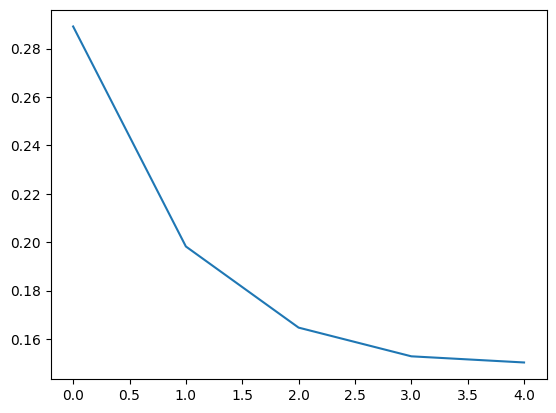

In [6]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("LOSS")
plt.legend()

KeyError: 'val_accuracy'

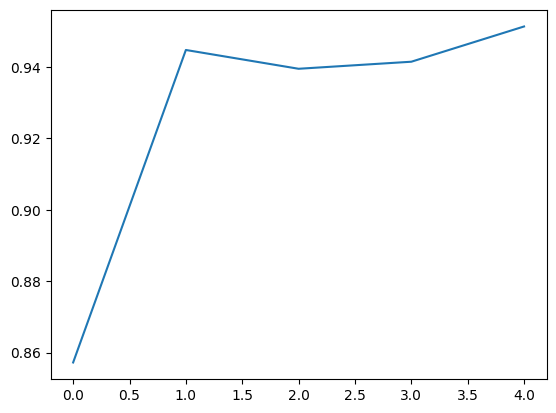

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.title("ACCURACY")
plt.legend()

In [7]:
#Take images from DB and check results on it.

def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if(val == 1):
        plt.xlabel("No Fire",fontsize=30)
    elif(val==0):
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 63ms/step
[[0.]]


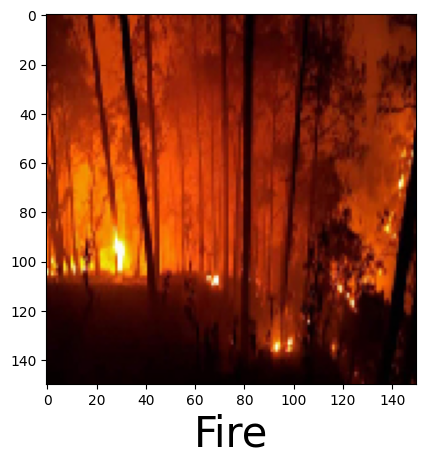

In [9]:
predictImage("Forest Fire Dataset/Testing/fire_0139.jpg")



1/1 [==============================] - 0s 45ms/step
[[1.]]


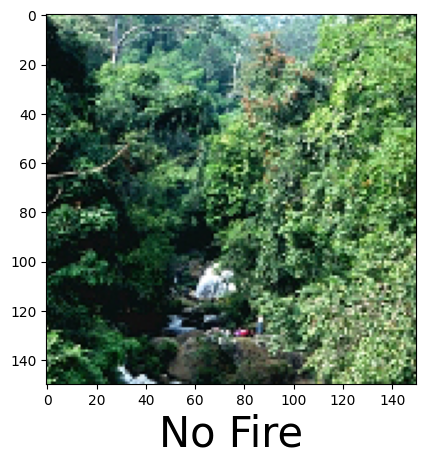

In [10]:
predictImage("Forest Fire Dataset/Testing/nofire_0267.jpg")

In [43]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Define paths to the dataset
train_data_dir = 'Forest Fire Dataset/Training'
val_data_dir = 'Forest Fire Dataset/Testing'


# Set up data generators
train_datagen = ImageDataGenerator(rescale=1/255)#, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255)

# Set up data generators to load data from directories
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_data_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps
)

# Save the model
model.save('forest_fire_detection_model.h5')

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.
Epoch 1/15
48/48 [==============================] - 24s 469ms/step - loss: 0.3165 - accuracy: 0.8882 - val_loss: 0.1656 - val_accuracy: 0.9421
Epoch 2/15
48/48 [==============================] - 21s 449ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.1284 - val_accuracy: 0.9553
Epoch 3/15
48/48 [==============================] - 23s 485ms/step - loss: 0.1227 - accuracy: 0.9605 - val_loss: 0.1212 - val_accuracy: 0.9526
Epoch 4/15
48/48 [==============================] - 22s 464ms/step - loss: 0.1118 - accuracy: 0.9632 - val_loss: 0.1216 - val_accuracy: 0.9500
Epoch 5/15
48/48 [==============================] - 22s 450ms/step - loss: 0.0865 - accuracy: 0.9691 - val_loss: 0.1202 - val_accuracy: 0.9605
Epoch 6/15
48/48 [==============================] - 22s 458ms/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.1073 - val_accuracy: 0.9605
Epoch 7/15
48/48 [==============================] - 22s 459

c:\Users\RUSHABH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the saved model
model = load_model('forest_fire_detection_model.h5')


# Function to display the heatmap on the image
def display_heatmap(img, heatmap):
    # Resize the heatmap to match the image size
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))

    # Apply a colormap and overlay the heatmap on the image
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    img_rgb = np.array(img.convert('RGB'))
    img_rgb = cv2.cvtColor(np.array(img_rgb), cv2.COLOR_RGB2BGR)
    overlay = cv2.addWeighted(img_rgb, 0.5, heatmap, 0.5, 0)

    # Display the image with the overlaid heatmap
    plt.figure(figsize=(10, 10))
    plt.imshow(overlay[:, :, ::-1])
    plt.show()

# Function to test the model on a new image
def test_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make the prediction
    prediction = model.predict(img_array)
    if prediction == 1:
        print(f"The image {image_path} does not contain a fire.")
    else:
        print(f"The image {image_path} contains a fire.")

    # Generate the heatmap
    heatmap = generate_heatmap(img_array, model)
    display_heatmap(img, heatmap)



# Function to generate the heatmap
def generate_heatmap(img_array, model):
    # Get the last convolutional layer output
    last_conv_layer = model.get_layer('max_pooling2d_15')
    
    # Create the heatmap model
    conv_output = last_conv_layer.output
    model_output = model.output
    heatmap_model = tf.keras.models.Model(inputs=model.inputs, outputs=[conv_output, model_output])

    # Get the gradients of the output with respect to the last convolutional layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = heatmap_model(img_array)
        loss = predictions[:, 0]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    # Compute the guided gradients
    cast_grads = tf.cast(grads > 0, tf.float32)
    cast_grads = tf.reduce_mean(cast_grads, axis=-1)
    heatmap = tf.reduce_mean(cast_grads, axis=-1)

    # Rescale the heatmap values
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

1/1 [==============================] - 0s 74ms/step
The image Forest Fire Dataset/Testing/fire/fire_0179.jpg contains a fire.


C:\Users\RUSHABH\AppData\Local\Temp\ipykernel_4424\4110889438.py:68: RuntimeWarning: divide by zero encountered in divide
  heatmap /= np.max(heatmap)
C:\Users\RUSHABH\AppData\Local\Temp\ipykernel_4424\4110889438.py:68: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
C:\Users\RUSHABH\AppData\Local\Temp\ipykernel_4424\4110889438.py:13: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)


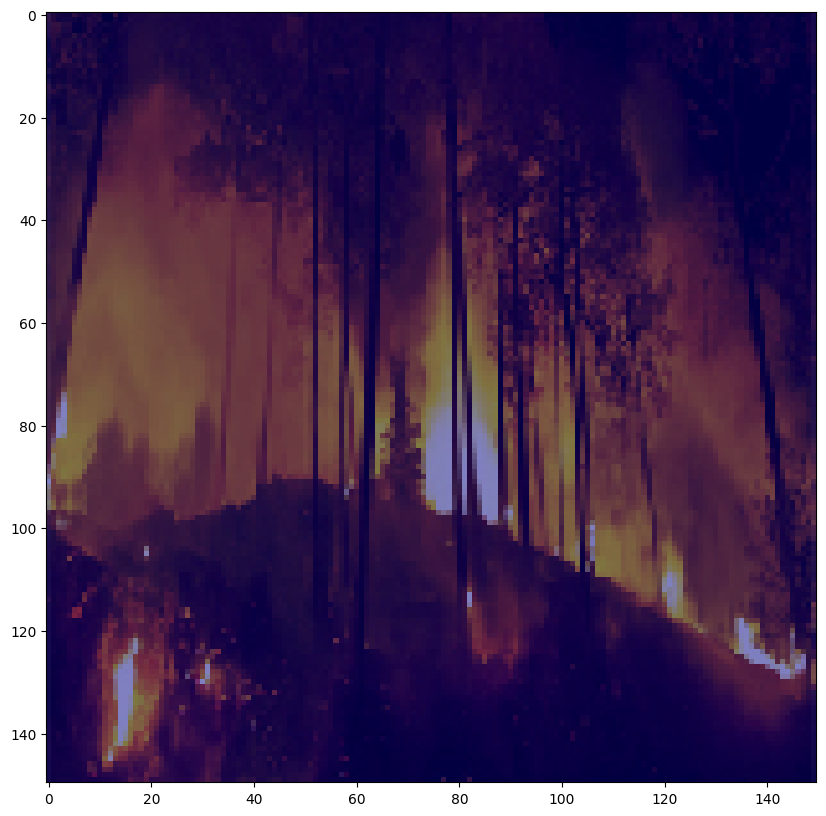

1/1 [==============================] - 0s 36ms/step
The image Forest Fire Dataset/Testing/no fire/nofire_0926.jpg does not contain a fire.


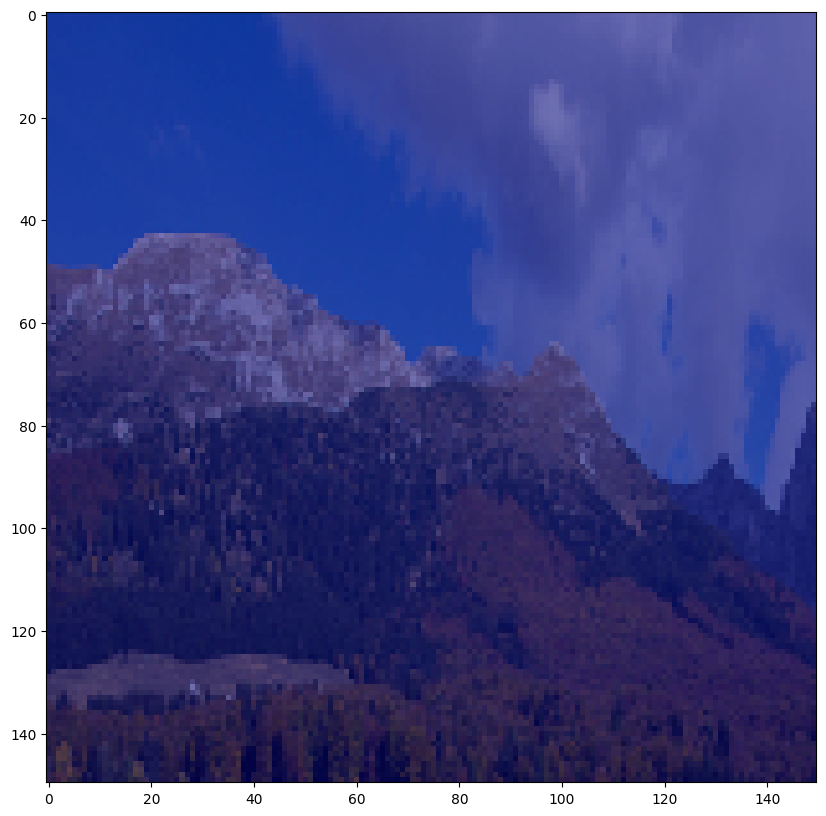

1/1 [==============================] - 0s 31ms/step
The image More-Images/Data/Train_Data/Non_Fire/NF_8.jpg does not contain a fire.


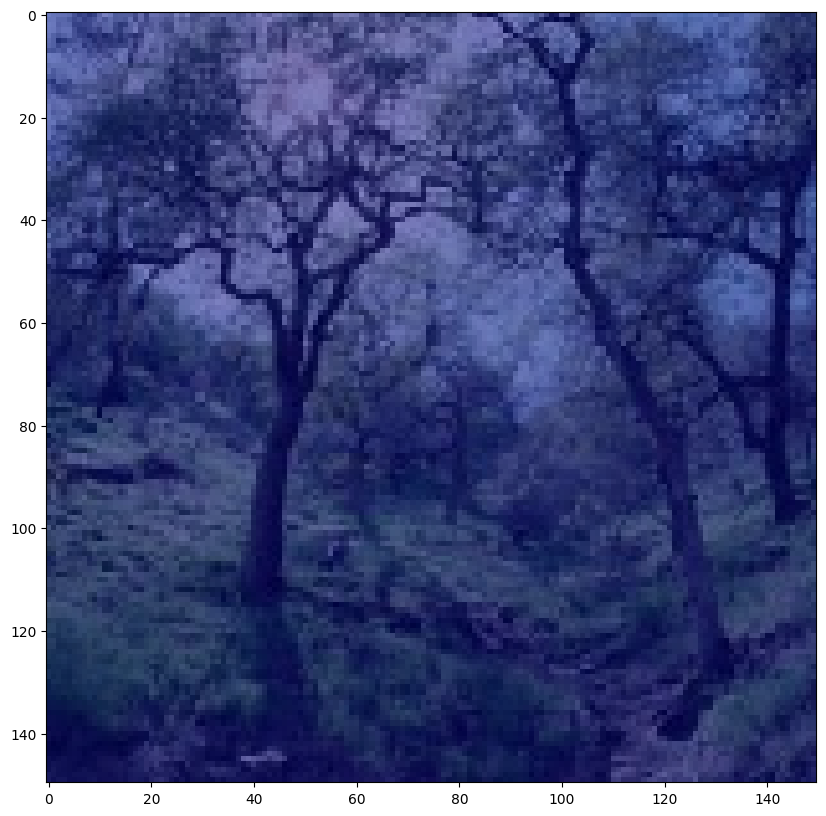

1/1 [==============================] - 0s 29ms/step
The image More-Images/Data/Train_Data/Fire/F_13.jpg contains a fire.


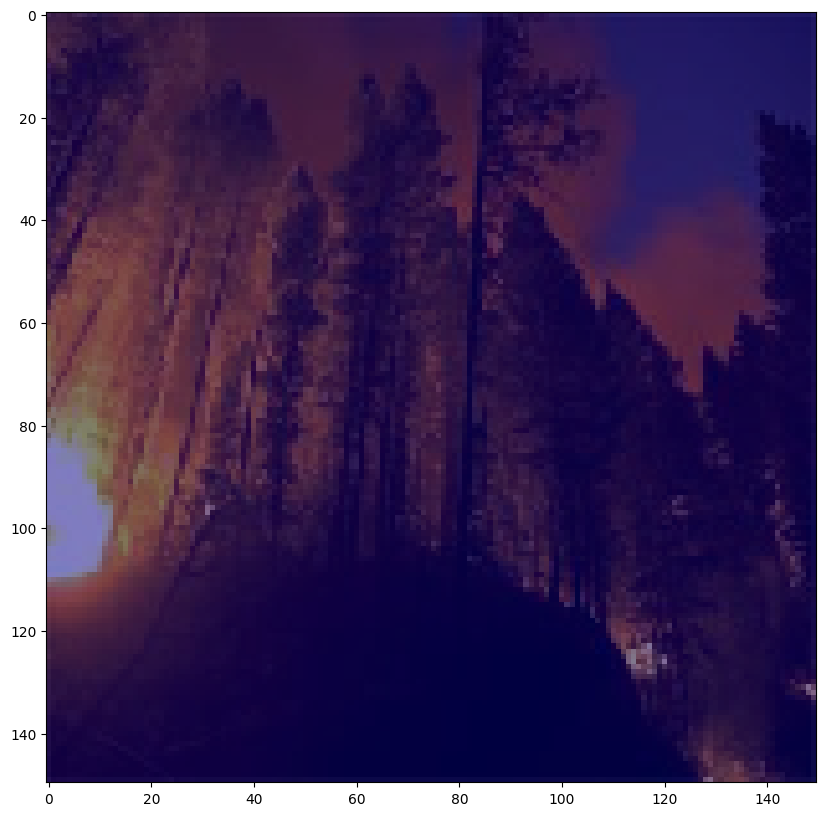

In [49]:
# Test the model on a new image
test_image('Forest Fire Dataset/Testing/fire/fire_0179.jpg')
test_image('Forest Fire Dataset/Testing/no fire/nofire_0926.jpg')
test_image('More-Images/Data/Train_Data/Non_Fire/NF_8.jpg')
test_image('More-Images/Data/Train_Data/Fire/F_13.jpg')